<div>
<img src="attachment:image.png" width="600"/>
</div>

<div>
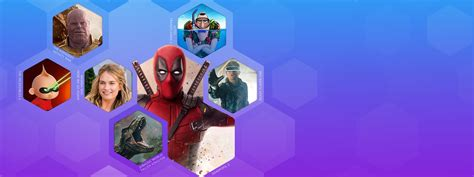
</div>

# Microsoft Movie Studio Data Analysis
---

**Authors**: [Andrew Bernklau](andrewbernklau1@gmail.com), [Kelsey Lane](kelsklane@gmail.com), [Lenore Perconti](lenorephotography@gmail.com)

## Overview
---

This project analyzes various [IMDb](https://www.imdb.com) datasets related to films in order to formulate relevant recomendations for the direction of Microsoft's new movie studio. Exploration of this data shows that movies that are in the drama genre have a higher average rating and runtimes of 112 minutes are preferred. A shortlist of recommended directors for these genres is also provided.

## Business Problem
---
In order to help establish their new studio, Microsoft should focus on producing original content in the drama genre, as this genre produces a higher rating on average. By following these recomendations, Microsoft can better their chances of producing high rated movies and help establish their new studio as a powerhouse. 

## Data
---
[IMDB](https://www.imdb.com) is a public, online database with information about video media content and ratings of movies, which can be used to gage public sentiment towards different films. The IMDb datasets provide information about basic movie and crew information, as well as their ratings, which we used in this analysis. There are also unique IDs associated with both films and people to ensure there is no confusion with similarly named features. Most of these datasets were combined into one, named imdb, in order to facilitate the exploration of the data, though the basic descriptions of crew were kept seperate to help keep the data cleaner for the inital exploration.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [7]:
imdb = pd.read_csv('Data/imdb.csv')
imdb.head(3)

,tconst,primary_title,start_year,genres,runtime_minutes,directors,writers,averagerating,numvotes
0,tt0069049,The Other Side of the Wind,2018,Drama,122.0,nm0000080,"nm0000080,nm0462648",6.9,4517
1,tt0315642,Wazir,2016,"Action,Crime,Drama",103.0,nm2349060,"nm7430071,nm1249226,nm0006765,nm0430785,nm2349...",7.1,15378
2,tt0360556,Fahrenheit 451,2018,"Drama,Sci-Fi,Thriller",100.0,nm1023919,"nm0001969,nm1023919,nm0618881",4.9,14469


In [8]:
imdb_name_basics = pd.read_csv('Data/imdb_name_basics_slim')
imdb_name_basics.head(3)

,nconst,primary_name,death_year
0,nm0061671,Mary Ellen Bauder,NaN
1,nm0061865,Joseph Bauer,NaN
2,nm0062070,Bruce Baum,NaN


## Data Preparation
---
The full list of datasets used included the basic movie title and crew information, the title crew information, and title rankings. The name basics dataframe is read in seperatly above.

In [9]:
imdb_title_basics = pd.read_csv('Data/imdb.title.basics.csv.gz', compression='gzip')
imdb_title_crew = pd.read_csv('Data/imdb.title.crew.csv.gz', compression='gzip')
imdb_title_ratings = pd.read_csv('Data/imdb.title.ratings.csv.gz', compression='gzip')

### Data Cleaning

The datasets were paired down to only include the tconst column, which is the unique ID for each movie title, as well as the title (primary_title) column to be able to grab any specific well-preforming movie in a readable way. The start year (start_year) and number of votes (numvotes) columns are also included to help appropriately filter the data. As we are looking for the best rated genres, as well as their average runtime and highest rated directors and writers, the appropriate columns are also included to allow for this analysis. Any additional columns that wouldn't be used are thus not included and the original column names are kept as they are straightforward. The imdb_name_basics dataframe read in above with the imdb dataframe is talked about seperatly in a section further down.

In [10]:
#Pairs the original datasets down to the relevant columns
imdb_title_basics_slim = imdb_title_basics[['tconst', 'primary_title', 'start_year', 'genres', 'runtime_minutes']]
imdb_name_basics_slim = imdb_name_basics[['nconst', 'primary_name', 'death_year']]
imdb_title_ratings_slim = imdb_title_ratings[['tconst', 'averagerating', 'numvotes']]

We focused on a subset of the full IMDb data that only contains movies released in the last five years (2014-2018 for the purposes of the given data), in order to ensure that any reccomendations relate to current market trends. We also limited the dataset down to movies that had a number of votes greater than or equal to the mean number of votes (3,524) so that we could root out any films that had a small but dedicated audience. While we considered using the median number of votes here it only came out to 49 total votes, which seemed too small to properly represent a broad public sentiment.

In [11]:
#Pairs the appropriate datasets read in above down by the restrictions listed
recent_imdb_title_basics = imdb_title_basics_slim[(imdb_title_basics_slim['start_year'] >= 2014) 
                                                  & (imdb_title_basics_slim['start_year'] <= 2018)]
imdb_title_ratings_half = imdb_title_ratings_slim[imdb_title_ratings_slim['numvotes'] >= 
                                                  imdb_title_ratings_slim['numvotes'].mean()]

### Data Merging

We then merged the resulting datasets together using an inner merge to make sure we were only looking at movies that had all the data we were going to explore.

In [12]:
one = recent_imdb_title_basics.merge(imdb_title_crew, how = 'inner')
imdb = one.merge(imdb_title_ratings_half, how = 'inner')
#Save cleaned dataset as CSV file
imdb.to_csv('Data/imdb.csv', index = False)

This left us with a dataset with only 2,549 rows, going down from 146,144 entries in the original IMDb datasets. This obviously provides us with less data to work with and may not be a fully accurrate representation of current trends. Also, as only the IMDb datasets are used, this can skew our results as IMDb may not be a good representation of the opinions of the general populace. Finally, 57% of the films in the dataframe used for analysis have drama as a genre. This clearly adds a bias to the data, so getting to use a more robust dataset that could fill out the other genres more could help produce more accurrate results, though this bias could exist as dramas are simply favored and thus more highly rated on average.

### IMDb_name_basics DataFrame Preperation

IMDb name basics is included seperately in order to help keep the original IMDb data neat, as its' inclusion would duplicate movie rows and mess with the analysis of genre and runtime. Therefore, it is brought in later on when the director data are analyzed so that there are not accidental duplicates. The original dataset is slimmed down to only include the nconst column that uniquely identifies each crew member, as well as their name to know what each ID tag refers to, as well as their death year to prevent any reccomendations of dead directors or writers. However, as this data only dates back to 2018, there may be directors and writers in the list that are currently dead, but that information is not in the dataset yet.

In [13]:
imdb_name_basics_slim = imdb_name_basics[['nconst', 'primary_name', 'death_year']]
imdb_name_basics_slim.to_csv('Data/imdb_name_basics_slim', index = False)

## Analysis

In [14]:
import code.visuals as vis

### Genre
---
The first approach we took is to look at the distribution of high-rated genres to get a sense of what genres are most popular and well-liked. As the graph below shows, 40% more movies produced that are highly rated end up falling in the drama genre. The second genre with the highest quantity of highly rated films is action, and thus is another good genre to potentially explore, though this analysis focuses on drama. By focusing on producing drama movies first, this can help Microsoft have a high chance of achieving critical acclaim and thus establish themselves as a powerhouse right from the get go.

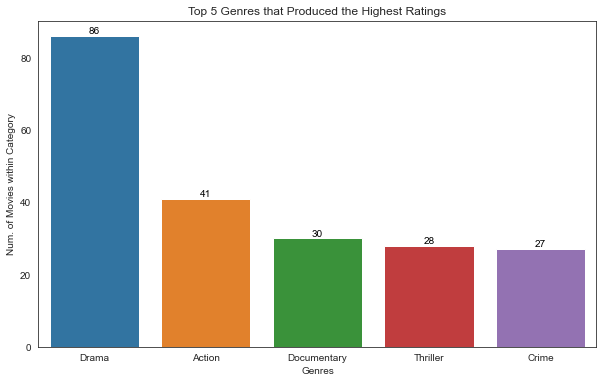

In [15]:
vis.top_5_genres(imdb);

### Runtime
---
Another angle we looked at is the average runtime of high rated movies to get a sense of a good runtime option. This data is filtered to look at only the top two rated genres discovered above, drama and action, in order to help hone in the reccomendations. Knowing the average runtime of drama and action films can help Microsoft know how to produce movies in order to have the best chance of obtaining public approval and recieving high ratings for their films.

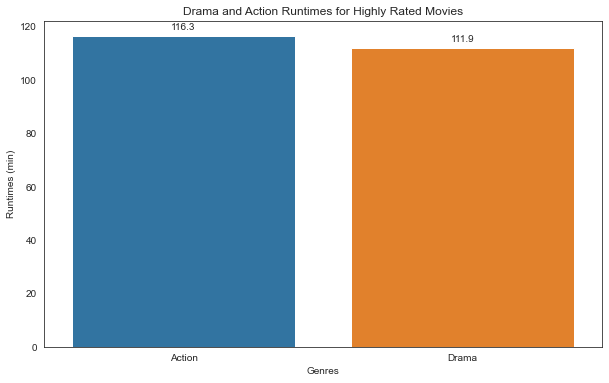

In [16]:
vis.runtime_minutes(imdb);

### Directors
---
Finally, we looked at directors that produce drama films in order to select the top 10 rated drama directors. We narrowed the list of directors down to those who've produced three or more drama films to make sure there wasn't any noise distorting the results from directors with only one or two films. The linegraph below shows the distribution of ratings for all these directors.

# MISSING LINE GRAPH HERE

In order to get a clearer view of what directors would be best to recommend we focused in on the ten highest rated and graphed that result below. Here, we can see that Damien Chazelle is the director with the highest average movie rating, and would thus be the primary recommendation for director to work with. This will help Microsoft produce very highly rated genres, which in turn will help them put a good foot forward into the industry.

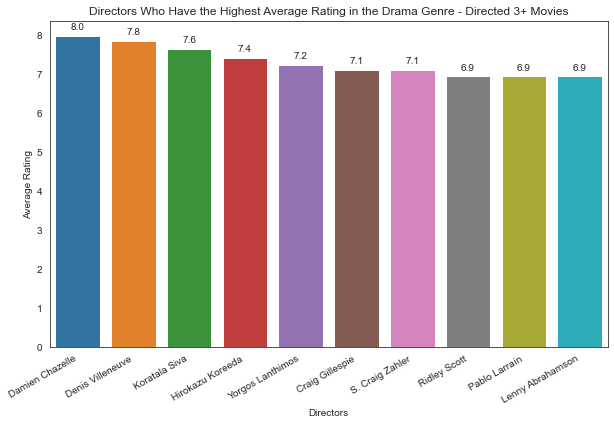

In [17]:
vis.top_10_directors_drama(imdb, imdb_name_basics_slim);

## Conclusions
---
This analysis leads to three recomendations for films to help debut Microsoft's new movie studio
- **Focus on the Drama genre.** We see 40% more high rated movies are dramas compared to the next highest genre, action.
- **Hire one of the top rated drama directors.** Given that they're prolific in the field in recent years and have high average ratings, they are likely to produce a better drama movie.
- **Aim for a runtime of 112 minutes.** High rated drama movies on avergae have a runtime of 112 minutes, so it sets a good standard to aim for.

## Next Steps
---
Additional analysis could yield further insight into helping direct how Microsoft should approach its movie creation
- **Bring in corporate constraints.** Knowing budget constraints or the quantity of movies to produce could shift how many genres to focus on or which directors to hire.
- **Consider the implications of COVID on watch habits.** Drama might not be such a frontrunner in ratings anymore as COVID-19 could have shifted interest to other genres. Therefore, it would be good to further probe into the impact COVID may have had on this type of data.
- **Differences between streaming and theatres.** With streaming being an at-home service, this may influence the watch habits of the population. As a result, it would be good to consider streaming-specific data and see if there are different trends present in that data.
- **The domestic market versus an international one.** Since the dataset used in this project contains both domestic and international movies, a global approach to the problem was taken. Therefore, it would be a good idea in the future to consider the differences that might be present in just the sole domestic market.